In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix

In [15]:
df =pd.read_csv('/content/drive/MyDrive/DataSets/weather.csv')

In [16]:
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rain,Mild,High,False,Yes
4,Rain,Cool,Normal,False,Yes
5,Rain,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rain,Mild,Normal,False,Yes


In [23]:
print("Dataset Length: ", len(df))
print("Dataset Shape: ",df.shape)

Dataset Length:  14
Dataset Shape:  (14, 5)


In [24]:
# Printing the dataset obseravtions
print("Dataset: \n",df.head())

Dataset: 
     Outlook Temperature Humidity  Windy Play
0     Sunny         Hot     High  False   No
1     Sunny         Hot     High   True   No
2  Overcast         Hot     High  False  Yes
3      Rain        Mild     High  False  Yes
4      Rain        Cool   Normal  False  Yes


In [28]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Play', axis=1)
y = df['Play']

In [29]:
# Convert categorical variables into numerical values
X_encoded = pd.get_dummies(X)

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [31]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [32]:
# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [40]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[1 0]
 [0 2]]


In [35]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


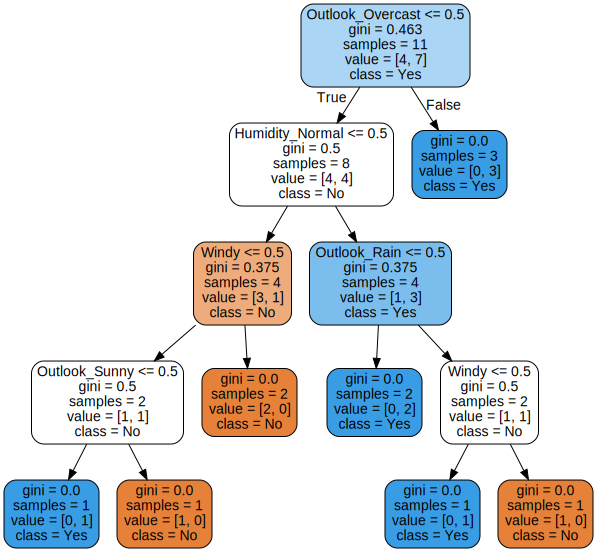

In [38]:
from sklearn.tree import export_graphviz
from graphviz import Source

dot_data = export_graphviz(clf, out_file=None, feature_names=X_encoded.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
graph = Source(dot_data)
graph.render("decision_tree")

# Display the decision tree
graph